In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

In [181]:
alz_df = pd.read_csv('mortality_cleaned_data.csv')
alz_df['alz_per_capita'] = (alz_df['alzheimer'] / alz_df['Pop2021']) * 100000

alz_df['week'] = pd.to_datetime(alz_df['week'])
alz_df['date_accessed'] = pd.to_datetime(alz_df['date_accessed'])
alz_df.head(5)

,Unnamed: 0,rank,State,Pop,Growth,Pop2021,Pop2010,growthSince2010,Percent,density,...,lower_resp_distress,other_resp,nephritis,nephrotic_synd_and_nephrosis,other,heart_disease,cerebrovasc_disease,covid_19_multiple_cause,Code,alz_per_capita
0,0,24.0,Alabama,4949697.0,0.0031,4934193.0,4785437.0,0.0343,0.0147,97.7332,...,86.0,13.0,25.0,25.0,268.0,81.0,0.0,0.0,AL,1.094404
1,1,24.0,Alabama,4949697.0,0.0031,4934193.0,4785437.0,0.0343,0.0147,97.7332,...,72.0,20.0,23.0,34.0,274.0,68.0,0.0,0.0,AL,0.830936
2,2,24.0,Alabama,4949697.0,0.0031,4934193.0,4785437.0,0.0343,0.0147,97.7332,...,73.0,21.0,23.0,24.0,239.0,45.0,0.0,0.0,AL,1.074137
3,3,24.0,Alabama,4949697.0,0.0031,4934193.0,4785437.0,0.0343,0.0147,97.7332,...,61.0,11.0,14.0,23.0,284.0,70.0,0.0,0.0,AL,1.094404
4,4,24.0,Alabama,4949697.0,0.0031,4934193.0,4785437.0,0.0343,0.0147,97.7332,...,76.0,17.0,20.0,23.0,265.0,55.0,0.0,0.0,AL,1.175471


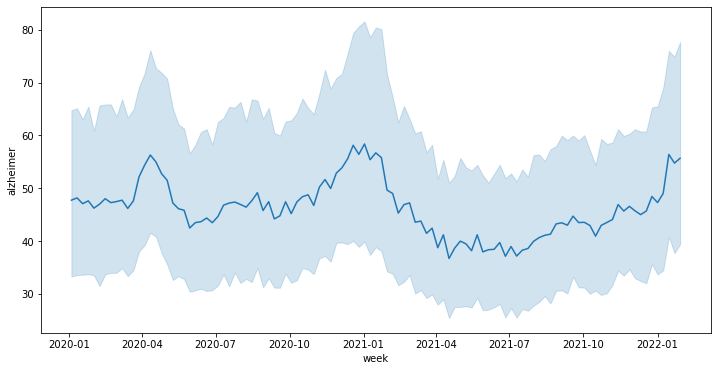

In [206]:
total_before_2022 = alz_df.loc[(alz_df['week'] < '2-01-2022')]
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=total_before_2022, x="week", y="alzheimer")
plt.show()

In [205]:
# top 10 medians per capita by state

state_geo = f"https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"
response = requests.get(state_geo)
geojson = response.json()

map_data = alz_df.groupby('Code', as_index = False)['alz_per_capita'].sum()

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=geojson,
    name="choropleth",
    data=map_data,
    columns=["Code", "alz_per_capita"],
    key_on="feature.id",
    fill_color="GnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Alzheimer Deaths (%)",
).add_to(m)

m

In [252]:
# top 10 max values per capita by state 
grouped_data = alz_df.groupby('Code')['alz_per_capita'].median().sort_values(ascending=False)
grouped_data.head(6)

Code
MS    1.179879
AL    1.094404
AR    1.054732
WV    0.961615
TN    0.921624
LA    0.918521
Name: alz_per_capita, dtype: float64

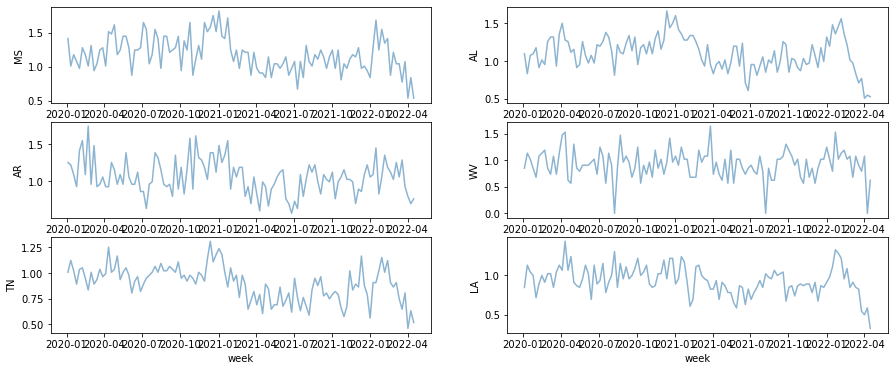

In [294]:
top_states = alz_df.loc[(alz_df.Code == 'MS') | (alz_df.Code == 'AL') | (alz_df.Code == 'WV') | (alz_df.Code == 'AR') | (alz_df.Code == 'LA') | (alz_df.Code == 'TN')]
states_wide = top_states.pivot_table('alz_per_capita', 'week', 'Code')


fig, axes = plt.subplots(3, 2, figsize=(15,6))

sns.lineplot(ax = axes[0, 0], data=states_wide['MS'])
sns.lineplot(ax=axes[0, 1], data=states_wide['AL'])
sns.lineplot(ax=axes[1, 0], data=states_wide['AR'])
sns.lineplot(ax=axes[1, 1], data=states_wide['WV'])
sns.lineplot(ax=axes[2, 0], data=states_wide['TN'])
sns.lineplot(ax=axes[2, 1], data=states_wide['LA'])

plt.show()